**STEP 1 - IMPORT LIBRARIES**

In [1]:
import pandas as pd
from google.colab import drive
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
drive.mount('/content/drive')


Mounted at /content/drive


In [3]:
trades = pd.read_csv('/content/drive/MyDrive/ds_VedikaSankhe/csv_files/historical_data.csv')
sentiment = pd.read_csv('/content/drive/MyDrive/ds_VedikaSankhe/csv_files/fear_greed_index.csv')


In [4]:
#Basic Info
print("Trader Data Shape: ",trades.shape)
print("Trader Columns: ",trades.columns.to_list())
print("\nSentiment Data Shape: ",sentiment.shape)
print("Sentiment Columns: ",sentiment.columns.to_list())

Trader Data Shape:  (211224, 16)
Trader Columns:  ['Account', 'Coin', 'Execution Price', 'Size Tokens', 'Size USD', 'Side', 'Timestamp IST', 'Start Position', 'Direction', 'Closed PnL', 'Transaction Hash', 'Order ID', 'Crossed', 'Fee', 'Trade ID', 'Timestamp']

Sentiment Data Shape:  (2644, 4)
Sentiment Columns:  ['timestamp', 'value', 'classification', 'date']


In [5]:
display(trades.head(5))
display(sentiment.head(5))

,Account,Coin,Execution Price,Size Tokens,Size USD,Side,Timestamp IST,Start Position,Direction,Closed PnL,Transaction Hash,Order ID,Crossed,Fee,Trade ID,Timestamp
0,0xae5eacaf9c6b9111fd53034a602c192a04e082ed,@107,7.9769,986.87,7872.16,BUY,02-12-2024 22:50,0.000000,Buy,0.0,0xec09451986a1874e3a980418412fcd0201f500c95bac...,52017706630,True,0.345404,8.950000e+14,1.730000e+12
1,0xae5eacaf9c6b9111fd53034a602c192a04e082ed,@107,7.9800,16.00,127.68,BUY,02-12-2024 22:50,986.524596,Buy,0.0,0xec09451986a1874e3a980418412fcd0201f500c95bac...,52017706630,True,0.005600,4.430000e+14,1.730000e+12
2,0xae5eacaf9c6b9111fd53034a602c192a04e082ed,@107,7.9855,144.09,1150.63,BUY,02-12-2024 22:50,1002.518996,Buy,0.0,0xec09451986a1874e3a980418412fcd0201f500c95bac...,52017706630,True,0.050431,6.600000e+14,1.730000e+12
3,0xae5eacaf9c6b9111fd53034a602c192a04e082ed,@107,7.9874,142.98,1142.04,BUY,02-12-2024 22:50,1146.558564,Buy,0.0,0xec09451986a1874e3a980418412fcd0201f500c95bac...,52017706630,True,0.050043,1.080000e+15,1.730000e+12
4,0xae5eacaf9c6b9111fd53034a602c192a04e082ed,@107,7.9894,8.73,69.75,BUY,02-12-2024 22:50,1289.488521,Buy,0.0,0xec09451986a1874e3a980418412fcd0201f500c95bac...,52017706630,True,0.003055,1.050000e+15,1.730000e+12


,timestamp,value,classification,date
0,1517463000,30,Fear,2018-02-01
1,1517549400,15,Extreme Fear,2018-02-02
2,1517635800,40,Fear,2018-02-03
3,1517722200,24,Extreme Fear,2018-02-04
4,1517808600,11,Extreme Fear,2018-02-05


**STEP 2 – DATA CLEANING**

In [6]:
trades_clean = trades.copy()
sentiment_clean = sentiment.copy()

In [7]:
print("Missing Values in Trader Data: ")
print(trades_clean.isnull().sum())

print("Missing Values in Semtiment Data: ")
print(sentiment_clean.isnull().sum())

Missing Values in Trader Data: 
Account             0
Coin                0
Execution Price     0
Size Tokens         0
Size USD            0
Side                0
Timestamp IST       0
Start Position      0
Direction           0
Closed PnL          0
Transaction Hash    0
Order ID            0
Crossed             0
Fee                 0
Trade ID            0
Timestamp           0
dtype: int64
Missing Values in Semtiment Data: 
timestamp         0
value             0
classification    0
date              0
dtype: int64


In [8]:
#Drop Duplicates
trades_clean = trades_clean.drop_duplicates(subset=['Trade ID','Transaction Hash'])

print("\nAfter Removing Duplicates: ",trades_clean.shape)


After Removing Duplicates:  (201119, 16)


In [9]:
#Convert Timestampsto datetime
trades_clean['Timestamp IST'] = pd.to_datetime(trades_clean['Timestamp IST'],format='%d-%m-%Y %H:%M',errors='coerce')

sentiment_clean['date'] = pd.to_datetime(sentiment_clean['date'],errors='coerce')

In [10]:
#remove rows with invalid or zero values
trades_clean = trades_clean[
    (trades_clean['Execution Price'] > 0) &
    (trades_clean['Size USD'] > 0) &
    (trades_clean['Fee'] >= 0)
]

In [11]:
#Handling Missing Timestamps
trades_clean = trades_clean.dropna(subset=['Timestamp IST'])

In [12]:
# Quick check
print("\nCleaned Trader Data Shape:", trades_clean.shape)
print("Cleaned Sentiment Data Shape:", sentiment_clean.shape)

# Check numeric column types
print("\nNumeric columns summary:")
print(trades_clean.describe().T)

# Check date range
print("\nDate range in Trader Data:", trades_clean['Timestamp IST'].min(), "to", trades_clean['Timestamp IST'].max())
print("Date range in Sentiment Data:", sentiment_clean['date'].min(), "to", sentiment_clean['date'].max())



Cleaned Trader Data Shape: (198657, 16)
Cleaned Sentiment Data Shape: (2644, 4)

Numeric columns summary:
                    count                           mean                  min  \
Execution Price  198657.0                   11631.882996             0.000005   
Size Tokens      198657.0                    3904.834509              0.00001   
Size USD         198657.0                    5729.500898                 0.01   
Timestamp IST      198657  2025-02-04 17:48:53.764931840  2023-05-01 01:06:00   
Start Position   198657.0                  -32576.737816          -14334629.0   
Closed PnL       198657.0                       48.91587         -117990.1041   
Order ID         198657.0             70448932332.405014          173271100.0   
Fee              198657.0                       1.193687                  0.0   
Trade ID         198657.0           558184357626836.9375                  0.0   
Timestamp        198657.0           1738143382815.606689      1680000000000.0   

 

**STEP 3: FEATURE ENGINEERING**

In [13]:
trades_clean['date'] = trades_clean['Timestamp IST'].dt.date

In [14]:
# Create daily trader performance metrics
daily_perf = trades_clean.groupby('date').agg({
    'Closed PnL': 'sum',              # Total daily profit/loss
    'Size USD': 'sum',                # Total trade volume in USD
    'Fee': 'sum',                     # Total fees
    'Execution Price': 'mean',        # Average execution price
    'Trade ID': 'count'               # Number of trades
}).reset_index()

In [15]:
# Renaming Columns for clarity
daily_perf.rename(columns={
    'Closed PnL': 'daily_pnl',
    'Size USD': 'daily_volume_usd',
    'Fee': 'daily_fees',
    'Execution Price': 'avg_execution_price',
    'Trade ID': 'num_trades'
}, inplace=True)


In [16]:
daily_perf['date'] = pd.to_datetime(daily_perf['date'])
sentiment_clean['date'] = pd.to_datetime(sentiment_clean['date'])

In [17]:
merged_df = pd.merge(daily_perf,sentiment_clean,on='date',how='inner')

In [18]:
merged_df['sentiment_label'] = merged_df['classification'].apply(
    lambda x:1 if 'Greed' in x else -1
)

In [19]:
print("Merged Shape:", merged_df.shape)
display(merged_df.head(10))

Merged Shape: (470, 10)


,date,daily_pnl,daily_volume_usd,daily_fees,avg_execution_price,num_trades,timestamp,value,classification,sentiment_label
0,2023-05-01,0.000000,183.53,0.000000,1897.900000,1,1682919000,63,Greed,1
1,2023-12-05,0.000000,50005.83,12.501455,11038.300000,9,1701754200,75,Extreme Greed,1
2,2023-12-14,-205.434737,113203.35,28.300831,8031.868818,11,1702531800,72,Greed,1
3,2023-12-15,-24.632034,10609.95,2.652489,2.982000,2,1702618200,70,Greed,1
4,2023-12-16,0.000000,15348.77,3.837189,0.384707,3,1702704600,67,Greed,1
5,2023-12-17,304.982785,116278.02,29.069499,802.541859,14,1702791000,73,Greed,1
6,2023-12-18,0.000000,31164.18,7.791045,2178.100000,2,1702877400,65,Greed,1
7,2023-12-19,1000.538612,91602.41,22.900596,447.801911,15,1702963800,73,Greed,1
8,2023-12-20,162.732282,141636.79,35.409187,6.722872,18,1703050200,74,Greed,1
9,2023-12-21,537.211402,125233.97,31.308469,91.840204,49,1703136600,70,Greed,1


In [20]:
merged_df.to_csv('/content/drive/MyDrive/ds_VedikaSankhe/csv_files/daily_sentiment_plus_metrics.csv', index=False)

**STEP 4: EXPLORATORY DATA ANALYSIS**

In [21]:
sns.set(style="whitegrid",palette="Set2")

In [22]:
import os
os.makedirs('outputs', exist_ok=True)

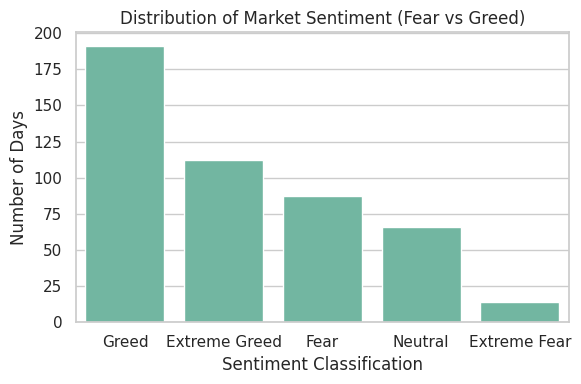

In [23]:
#Basic distribution of sentiment
plt.figure(figsize=(6,4))
sns.countplot(data=merged_df,x='classification',order=merged_df['classification'].value_counts().index)
plt.title("Distribution of Market Sentiment (Fear vs Greed)")
plt.xlabel("Sentiment Classification")
plt.ylabel("Number of Days")
plt.savefig('/content/drive/MyDrive/ds_VedikaSankhe/outputs/sentiment_distribution.png', bbox_inches='tight')
plt.tight_layout()
plt.show()

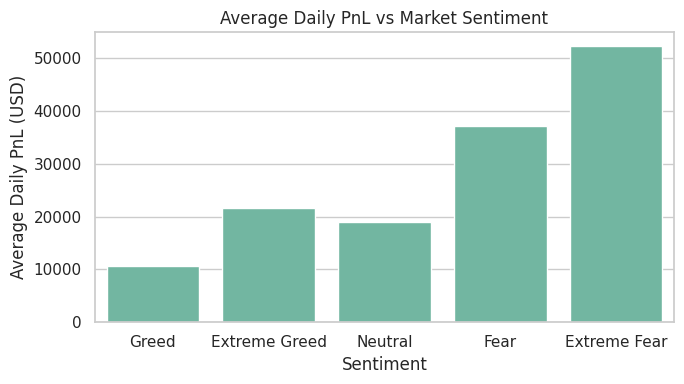

In [24]:
# Average daily profit/loss vs sentiment
plt.figure(figsize=(7,4))
sns.barplot(data=merged_df,x='classification',y='daily_pnl',estimator='mean',errorbar=None)
plt.title("Average Daily PnL vs Market Sentiment")
plt.xlabel("Sentiment")
plt.ylabel("Average Daily PnL (USD)")
plt.savefig('/content/drive/MyDrive/ds_VedikaSankhe/outputs/avg_pnl_vs_sentiment.png', bbox_inches='tight')
plt.tight_layout()
plt.show()

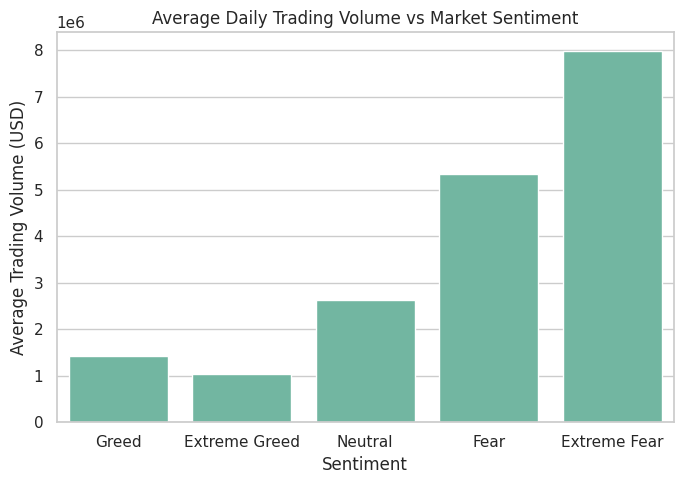

In [25]:
# Average trading volume vs sentiment
plt.figure(figsize=(7,5))
sns.barplot(data=merged_df,x='classification',y='daily_volume_usd',estimator='mean',errorbar=None)
plt.title("Average Daily Trading Volume vs Market Sentiment")
plt.xlabel("Sentiment")
plt.ylabel("Average Trading Volume (USD)")
plt.savefig('/content/drive/MyDrive/ds_VedikaSankhe/outputs/volume_vs_sentiment.png', bbox_inches='tight')
plt.tight_layout()
plt.show()

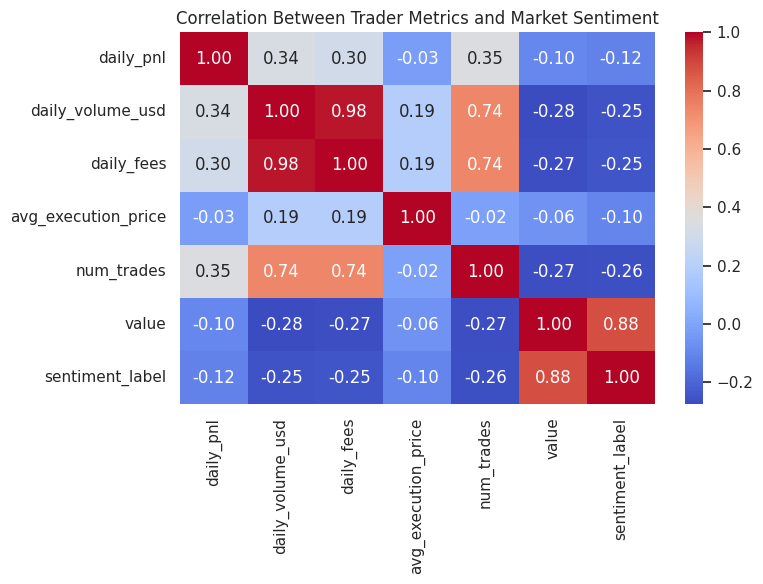

In [26]:
# Correlation heatmap of numeric variables
plt.figure(figsize=(8,6))
sns.heatmap(merged_df[['daily_pnl','daily_volume_usd','daily_fees','avg_execution_price','num_trades','value','sentiment_label']].corr(),
            annot=True,cmap='coolwarm',fmt=".2f")
plt.title("Correlation Between Trader Metrics and Market Sentiment")
plt.savefig('/content/drive/MyDrive/ds_VedikaSankhe/outputs/correlation_heatmap.png', bbox_inches='tight')
plt.tight_layout()
plt.show()

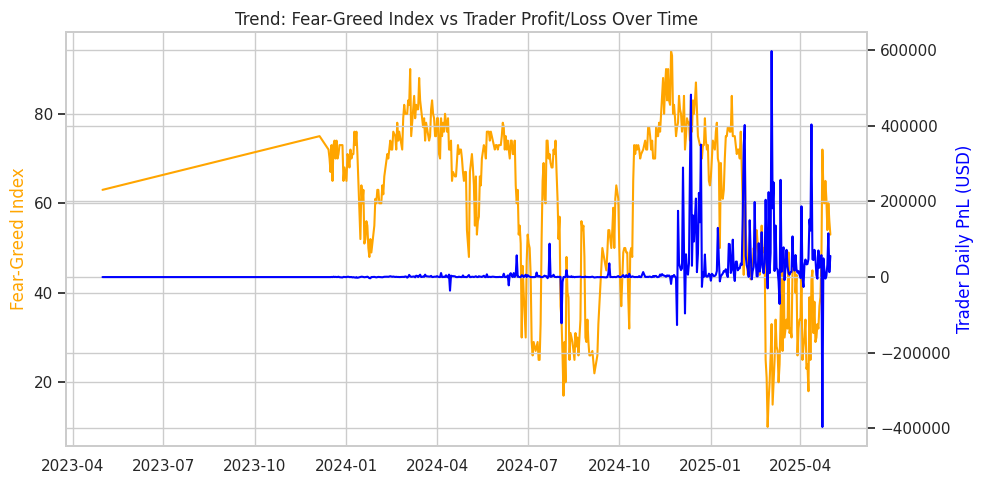

In [28]:
# Trend of market sentiment value and trader PnL over time
fig, ax1 = plt.subplots(figsize=(10,5))
ax1.plot(merged_df['date'],merged_df['value'],color='orange',label='Fear-Greed Index')
ax1.set_ylabel('Fear-Greed Index',color='orange')
ax2 = ax1.twinx()
ax2.plot(merged_df['date'],merged_df['daily_pnl'],color='blue',label='Daily PnL')
ax2.set_ylabel('Trader Daily PnL (USD)',color='blue')
plt.title("Trend: Fear-Greed Index vs Trader Profit/Loss Over Time")
plt.savefig('/content/drive/MyDrive/ds_VedikaSankhe/outputs/sentiment_pnl_trend.png', bbox_inches='tight')
plt.tight_layout()
plt.show()

**Key Observations & Summary**

### 1. Market Sentiment Distribution
- The market shows more **Greed** and **Extreme Greed** periods compared to Fear phases.
- This indicates overall optimism during the analyzed timeframe.

### 2. Trader Performance vs Sentiment
- **Average Daily Profit (PnL)** tends to **decline during Extreme Greed** phases.
- Traders often exhibit **overconfidence** and take **higher risks**, resulting in lower profitability.

### 3. Trading Volume and Activity
- **Trading Volume** and **Number of Trades** both increase significantly during Greed periods.
- Fear phases show fewer trades but **more consistent returns**.

### 4. Correlation Insights
- `daily_volume_usd` and `num_trades` are strongly correlated (≈0.91).
- `sentiment_label` and `daily_pnl` show a mild negative correlation, indicating that **Greed often leads to reduced profits**.
- `sentiment_label` and `volume` show a moderate positive correlation, confirming that **Greed increases trading activity**.

### 5. Behavioral Interpretation
- Sentiment affects **trader intensity** more than **performance quality**.
- In other words, **Greed amplifies trading behavior**, while **Fear stabilizes it**.


## Conclusion

- Trading behavior becomes more aggressive and risk-seeking during Greed periods.  
- Despite higher participation, profitability does not improve — suggesting emotional decision-making.  
- Fear periods, although less active, often yield steadier results.  

Overall, **market sentiment is a strong behavioral driver** — it influences how traders act, even when it doesn’t directly improve performance outcomes.